# Coding practice \#3: Due midnight, November 1

files needed = ('GDPC1.csv')

Answer the questions below in a jupyter notebook. You can simply add cells to this notebook and enter your answers. When you are finished, upload the completed notebook to canvas. 

A reminder: My office hours are Tuesdays 2:30PM-3:30PM and Thursdays 10:00AM-11:00AM in Soc Sci 7444. You can also send me questions by email. 

*You should feel free to discuss the coding practice with your classmates, but the work you turn in should be your own.*

# Exercise 0: Ruhl, Kim
Replace 'Your name' above with your actual name. Enter it as: last name, first name.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%config Completer.use_jedi = False

# Exercise 1: Making subplots

**Note: This exercise uses the** `banking_data` **DataFrame created in coding practice 2 in Exercise 2.**

The U.S. banking industry has become increasingly concentrated over the years, especially due to a wave of mergers and acquisitions that occurred in the 1990s and 2000s. Furthermore, many commercial banks have begun to close their physical branch locations in recent years due to the rise of online and mobile banking. (See https://www.forbes.com/sites/laurengensler/2016/07/18/bank-branch-closures-more-to-come/#a1c22cd5e04f.)

In this exercise, you will create three time series plots of the number of banks, number of offices, and number of offices per bank between 1934 and 2017. 

### Part (a):

1. Open your notebook from coding practice \#2. Run your code for exercise 2. You should have a DataFrame named `banking_data`. 
2. Save `banking_data` to a csv file named 'banking_data.csv'.
3. In a new cell below, read 'banking_data.csv' into a DataFrame named `banking_data`

In [2]:
# I ran this code in my coding practice #2 notebook

# banking_data.to_csv('banking_data.csv')

# Then I copied the file into this notebook's working directory 

In [3]:
banking_data = pd.read_csv('banking_data.csv')
banking_data.head(2)

,Unnamed: 0,year,banks,offices,offices_per_bank
0,0,2017,4918,84081,17.096584
1,1,2016,5112,85201,16.666862


### Part (b):

1. Create a figure with three subplots (all in a single column). Set the figure size to (15,15).
2. In the first subplot, create a line plot of the number of banks by year. Make the line dotted and black. Label the x-axis "Year" and the y-axis "Number of banks". Set the title of this subplot as "Number of U.S. commercial banks, 1934-2017".
3. In the second subplot, create a line plot of the number of offices by year. Make the line dashed and red. Label the x-axis "Year" and the y-axis "Number of offices". Set the title of this subplot as "Number of offices of U.S. commercial banks, 1934-2017".
4. In the third subplot, create a line plot of the average number of offices per bank. Make the line blue with a dash-dot pattern. Label the x-axis "Year" and the y-axis "Number of offices per bank." Set the title of this subplot as "Average number of offices per bank, 1934-2017".

**Note:** We did not cover subplots in class. There is information about them at the bottom of the notebook 'matplotlib_1.ipynb'

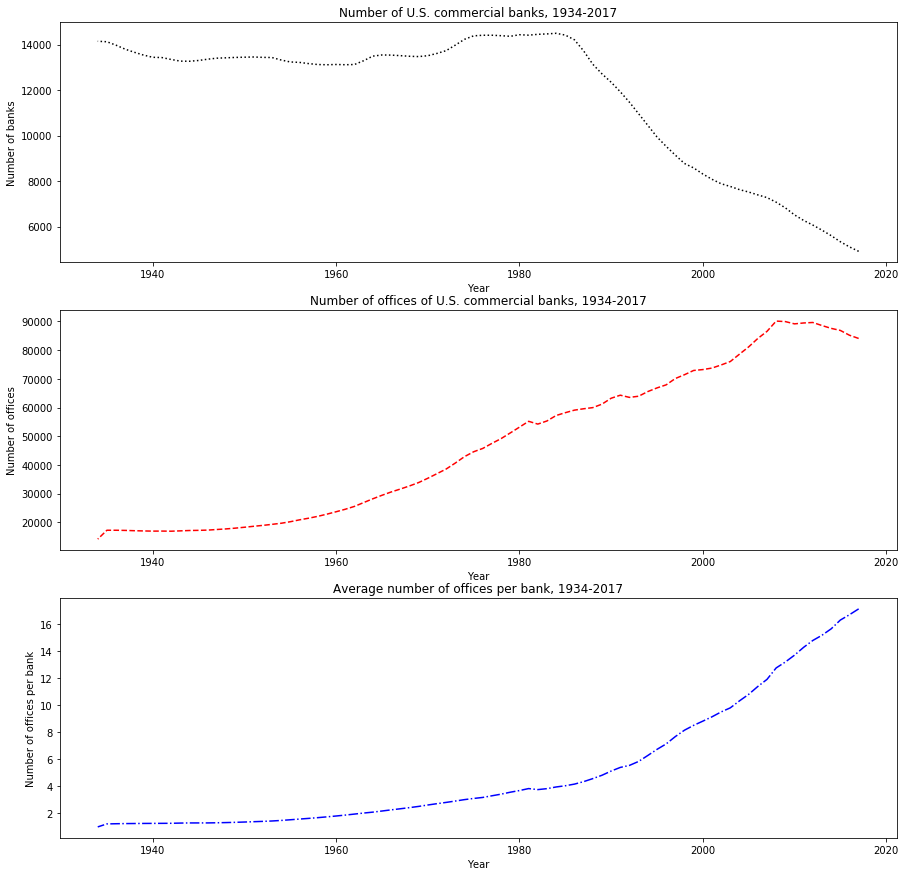

In [4]:
# Create figure axes objects
fig1, (ax1,ax2,ax3) = plt.subplots(3,1,figsize = (15,15))

# Plot the first series and set label and line options:
ax1.plot(banking_data['year'],banking_data['banks'],'k:')
ax1.set(xlabel="Year", ylabel="Number of banks", title="Number of U.S. commercial banks, 1934-2017")

# Plot the second series and set label and line options:
ax2.plot(banking_data['year'],banking_data['offices'],'r--')
ax2.set(xlabel="Year", ylabel="Number of offices", title="Number of offices of U.S. commercial banks, 1934-2017")

# Plot the third series and set label and line options:
ax3.plot(banking_data['year'],banking_data['offices_per_bank'],'b-.')
ax3.set(xlabel="Year", ylabel="Number of offices per bank", title="Average number of offices per bank, 1934-2017")

plt.show()

### Part (c):

Why might plotting these three lines on the same axes be problematic or confusing? Create a new markdown cell below to write your answer.

The main problem is that each of these series have vastly different magnitudes. The number of banks ranges from about 5,000 to 15,000, the number of offices ranges from around 15,000 to 90,000, and the number of offices per bank ranges from around 1 to 17. It would be very difficult to see the trends in these time series if they were plotted together. For example, the number of offices per bank would look flat.

### Part (d):

Create a new figure that plots the three time series above on the same plot. Set the figure size to (15,5). Maintain the same line color and pattern for each series as above, and add a legend with labels for each line.

Does this plot confirm your answer in part (c)?

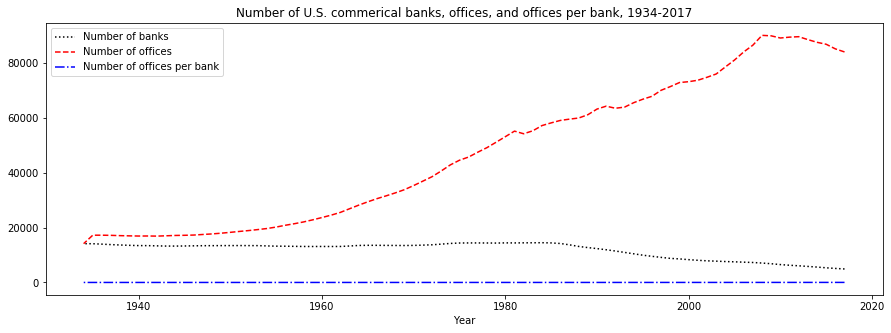

In [5]:
new_fig, new_ax = plt.subplots(figsize = (15,5))

new_ax.plot(banking_data['year'],banking_data['banks'],'k:',label = "Number of banks")
new_ax.plot(banking_data['year'],banking_data['offices'],'r--',label = "Number of offices")
new_ax.plot(banking_data['year'],banking_data['offices_per_bank'],'b-.',label = "Number of offices per bank")
new_ax.set(title = "Number of U.S. commerical banks, offices, and offices per bank, 1934-2017", xlabel = "Year")
new_ax.legend()

plt.show()

## Yes, this figure makes it very hard to see movement in the number of offices per bank. This is not graphical excellence!

### Part (e):
Let's put the 'number of offices per bank' and the 'number of banks' variable on the same subplot with two different y-axes. Your figure should look something like [this one](http://kjrs3.com/f19econ690/99_Misc/parte.pdf).

1. Use the `twinx()` method of matplotlib ([docs](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.twinx.html)) to plot the number of banks on the left axis and the number of offices per bank on the right axis. 
2. Add all of the labels that you need. 

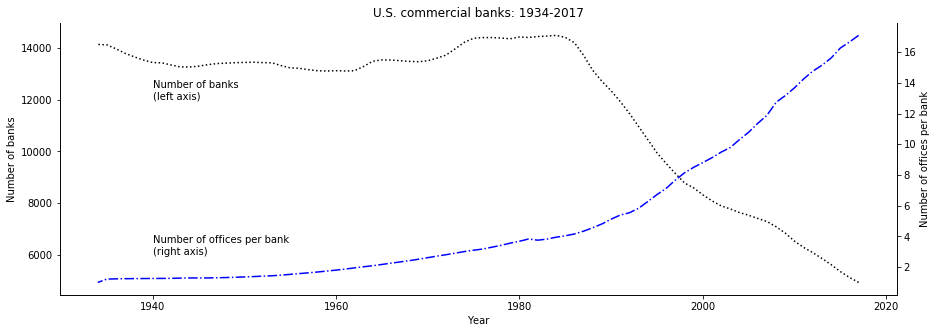

In [6]:
# Create figure axes objects
fig, ax1 = plt.subplots(figsize = (15,5))

# Plot the first series and set label and line options:
ax1.plot(banking_data['year'],banking_data['banks'],'k:')
ax1.set(xlabel="Year", ylabel="Number of banks")
ax1.set_title('U.S. commercial banks: 1934-2017')

ax2 = ax1.twinx()
ax2.plot(banking_data['year'],banking_data['offices_per_bank'],'b-.',label = "Number of offices per bank")
ax2.set(ylabel="Number of offices per bank")

ax1.spines['top'].set_visible(False)   # get rid of the line on top
ax2.spines['top'].set_visible(False)   # get rid of the line on top

ax1.text(1940,12000,'Number of banks \n(left axis)')
ax1.text(1940,6000,'Number of offices per bank \n(right axis)')

plt.savefig('parte.pdf', bbox_inches='tight')
plt.show()

## Exercise 2: Dates 

More work with U.S. GDP. The data come from FRED. 

### Part(a):
1. Create a DataFrame named `gdp` from the file 'GDPC1.csv'
2. Compute the growth rate of 'GDPC1'
3. Set the index to 'DATE'
4. Print out the first 3 rows of your DataFrame
5. What is the frequency of the data?

In [7]:
gdp = pd.read_csv('GDPC1.csv')
gdp['gr_gdp'] = gdp['GDPC1'].pct_change()*100
gdp.set_index('DATE', inplace=True)
gdp.head(3)

# The data are quarterly

,GDPC1,gr_gdp
DATE,,
1947-01-01,2033.061,NaN
1947-04-01,2027.639,-0.266691
1947-07-01,2023.452,-0.206496


### Part (b):
1. Plot the gdp growth rates against time (don't worry about labels or anything yet)

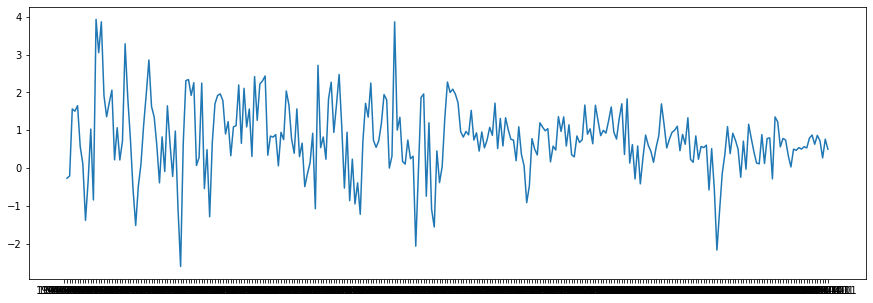

In [8]:
# Create figure axes objects
fig, ax1 = plt.subplots(figsize = (15,5))

ax1.plot(gdp.index, gdp['gr_gdp'])

plt.show()

## Part (c):

How's that x-axis look? Probably pretty ugly...the culprit is our index. It's a bunch of strings right now.

1. Convert the index to be datetime objects
2. Print out the type of the index

Note: If you set the index to datetimes in part (b), skip part 1 and just do part 2. 

In [9]:
gdp.index = pd.to_datetime(gdp.index)
type(gdp.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Part (d):

1. Now plot gdp growth rates against time
2. Add a horizontal line at y=0. Make the line black with width 0.75.
3. Add labels as needed

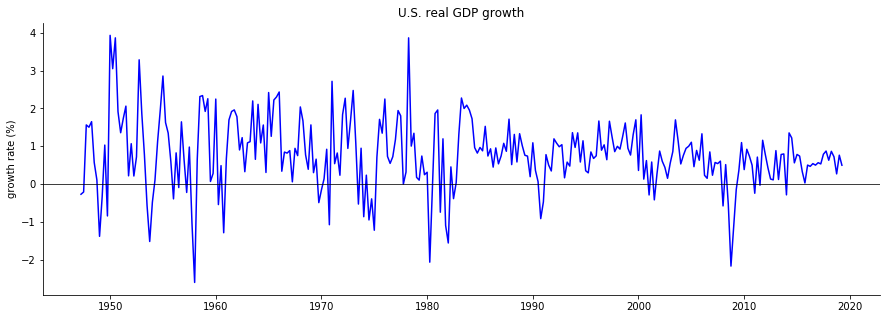

In [35]:
# Create figure axes objects
fig, ax1 = plt.subplots(figsize = (15,5))

ax1.plot(gdp.index, gdp['gr_gdp'], color = 'blue')
ax1.set(ylabel = 'growth rate (%)', title = 'U.S. real GDP growth')
ax1.axhline(y=0, color='black', linewidth=0.75)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.show()


### Part   (e):
1. Create an empty DataFrame named 'gdpa'
2. Create a variable named 'annual' in gdpa that holds the annual values of real gdp. Use the `resample()` method. The [quarterly data](https://fred.stlouisfed.org/series/GDPC1) are expressed as annual rates. Which aggregator function should you use: `mean()` or `sum()`? 

In [11]:
gdpa = pd.DataFrame()
gdpa['an_gdp'] = gdp['GDPC1'].dropna().resample('A').mean()


### Part (f):
1. Plot annual real gdp
2. Add labels as appropriate

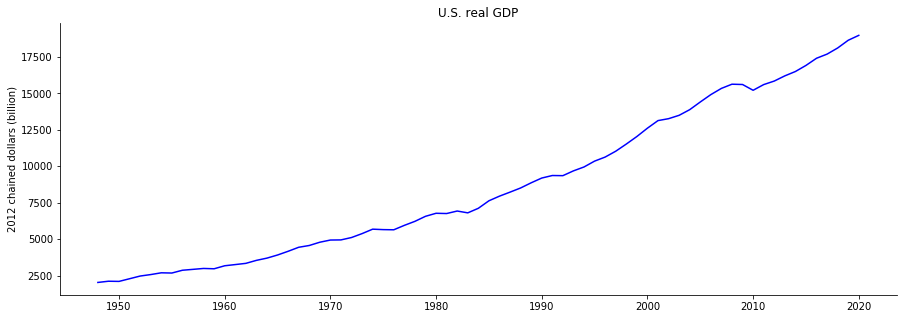

In [34]:
# Create figure axes objects
fig, ax1 = plt.subplots(figsize = (15,5))

ax1.plot(gdpa.index, gdpa['an_gdp'], color = 'blue')
ax1.set(ylabel = '2012 chained dollars (billion)', title = 'U.S. real GDP')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.show()

### Optional:

1. Express the y-axis labels in trillions

Do not make adjustments to the data. Use matplotlib commands to format the axis labels. 

In [31]:
def trillifier(x, tick_number):
    """Divide by 1000 to express the input values (given in billions) as trillions"""
    return x/1000

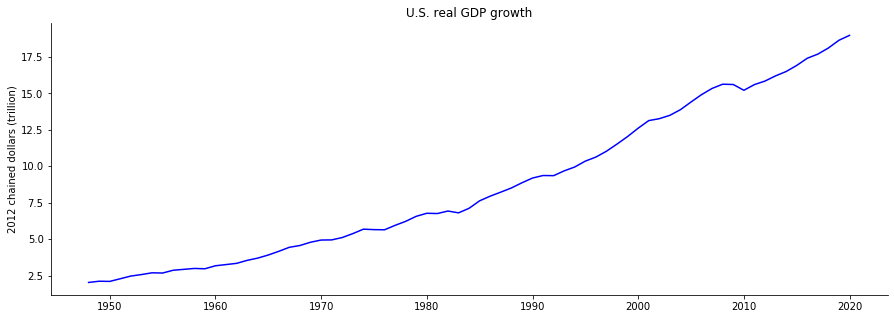

In [33]:
# Create figure axes objects
fig, ax1 = plt.subplots(figsize = (15,5))

ax1.plot(gdpa.index, gdpa['an_gdp'], color = 'blue')
ax1.set(ylabel = '2012 chained dollars (trillion)', title = 'U.S. real GDP growth')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.yaxis.set_major_formatter(plt.FuncFormatter(trillifier))

plt.show()